#References : 

https://www.kaggle.com/selener/multi-class-text-classification-tfidf

https://www.kaggle.com/darkcore/multi-class-text-classification-with-cnn

#Must Read :

###NLP Blog : 

Tokenization : https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

**Text Cleaning and Preprocessing:**   :  https://www.analyticsvidhya.com/blog/2021/06/part-3-step-by-step-guide-to-nlp-text-cleaning-and-preprocessing/



---


**Must Read : Step By Step Guide to NLP Mastery series**
https://www.analyticsvidhya.com/blog/2021/06/part-1-step-by-step-guide-to-master-natural-language-processing-nlp-in-python/



---



**Blog For NLP :**
https://www.machinelearningplus.com/category/nlp/

https://www.machinelearningplus.com/nlp/natural-language-processing-guide/



---


Future Read :

https://www.machinelearningplus.com/nlp/custom-text-classification-spacy/

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1a_Is-eD8SE-I1o3Xw6vW2HHijqQia4SM/view?usp=sharing

In [ ]:
id = '1a_Is-eD8SE-I1o3Xw6vW2HHijqQia4SM'

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1 = pd.read_csv('Filename.csv', encoding= 'latin')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Data Overview 

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk


In [ ]:
data1.shape

(185809, 9)

In [ ]:
data1.describe()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
count,185809,185575,176449,185599,185809,185039,185583,150350,185536
unique,185809,133,127530,93865,185410,92170,4,505,20
top,INC0021845,Monitor IIMSS,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...,2019-09-06 01:14:02,"Close Alert Received, Issue got resolved Autom...",P4,IIMSS User,Applications
freq,1,53164,3727,3727,4,49696,92076,19094,51059


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185809 entries, 0 to 185808
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Number             185809 non-null  object
 1   Assignment group   185575 non-null  object
 2   Description        176449 non-null  object
 3   Short description  185599 non-null  object
 4   Created            185809 non-null  object
 5   Resolution notes   185039 non-null  object
 6   Priority           185583 non-null  object
 7   Assigned To        150350 non-null  object
 8   Category           185536 non-null  object
dtypes: object(9)
memory usage: 12.8+ MB


In [ ]:
len(data1.Description.unique())

127531

In [ ]:
len(data1['Short description'].unique())

93866

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df1 = data1.copy()

In [ ]:
df1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk


In [ ]:
data1['Descript'] = data1['Short description']+' '+data1['Description']

In [ ]:
# data1['Descript'] = data1['Short description']

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category,Descript
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTWA03 - Node down BVABANTWA03 - Node...
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow,NaN
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk,Dell Monitor Intermittent Blackout Dell Monito...


In [ ]:
data1.loc[0, 'Descript']

'BVABANTWA03  -  Node down BVABANTWA03  -  Node down was triggered for City - Lontar Region - APAC for device BVABANTWA03'

In [ ]:
df = data1[['Descript','Assignment group']]
df.head()

,Descript,Assignment group
0,BVABANTWA03 - Node down BVABANTWA03 - Node...,Network L1
1,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...,Network L1
2,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...,Network L2
3,NaN,ServiceNow Support
4,Dell Monitor Intermittent Blackout Dell Monito...,Network L2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185809 entries, 0 to 185808
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Descript          176448 non-null  object
 1   Assignment group  185575 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [ ]:
df.shape

(185809, 2)

https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition

In [ ]:
df['Assignment group'].value_counts()

Monitor IIMSS                   53164
L1 English                      25677
Server L1                       24857
Deskside NA                     11443
Network L1                       8156
                                ...  
Data Architecture                   1
IT Security - Direct Defense        1
Server Managers                     1
Security Team                       1
Problem Management                  1
Name: Assignment group, Length: 133, dtype: int64

In [ ]:
# Get the count of each value
value_counts = df['Assignment group'].value_counts()

In [ ]:
value_counts

Monitor IIMSS                   53164
L1 English                      25677
Server L1                       24857
Deskside NA                     11443
Network L1                       8156
                                ...  
Data Architecture                   1
IT Security - Direct Defense        1
Server Managers                     1
Security Team                       1
Problem Management                  1
Name: Assignment group, Length: 133, dtype: int64

In [ ]:
value_counts.dtype

dtype('int64')

In [ ]:
value_counts.shape

(133,)

# .**value_counts()**  returns an array with Index as the names of Categories and their count as the 1 column.

In [ ]:
value_counts.index

Index(['Monitor IIMSS', 'L1 English', 'Server L1', 'Deskside NA', 'Network L1',
       'Engineering - Desktop Applications', 'O365 - Exchange', 'Azure L1',
       'EC&C - ProjectWise', 'Finance - Oracle Cloud',
       ...
       'Stefanini Reporting', 'Azure DevOps Admin', 'IT Div Manager Corp',
       'Power Bentley - Citrix', 'CIO Process Documents', 'Data Architecture',
       'IT Security - Direct Defense', 'Server Managers', 'Security Team',
       'Problem Management'],
      dtype='object', length=133)

In [ ]:
# Select the values where the count is less than 250 (or 5 if you like)
to_others = value_counts[value_counts <= 2000].index

In [ ]:
to_others

Index(['Workforce Management Systems', 'L1 Hindi', 'Server L2',
       'Voice Services', 'Deskside India ', 'Deskside China',
       'Workforce Management - PeopleSoft', 'User Access Management',
       'Deskside Indonesia', 'EC&C - SharePoint',
       ...
       'Stefanini Reporting', 'Azure DevOps Admin', 'IT Div Manager Corp',
       'Power Bentley - Citrix', 'CIO Process Documents', 'Data Architecture',
       'IT Security - Direct Defense', 'Server Managers', 'Security Team',
       'Problem Management'],
      dtype='object', length=117)

In [ ]:
len(to_others)

117

In [ ]:
df.loc[df['Assignment group'].isin(to_others), 'Assignment group'] = 'Others'

https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition/31512025

https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas

https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition

https://www.kite.com/python/answers/how-to-change-values-in-a-pandas-dataframe-column-based-on-a-condition-in-python#:~:text=loc%20to%20change%20values%20in,for%20which%20condition%20is%20True%20.

In [ ]:
# Examples from Stack over flow
# df.loc[df['First Season'] > 1990, 'First Season'] = 1
# Keep rows where the city column is not in to_remove
#df = df[~df.city.isin(to_remove)]

In [ ]:
df['Assignment group'].value_counts()

Monitor IIMSS                                           53164
Others                                                  31249
L1 English                                              25677
Server L1                                               24857
Deskside NA                                             11443
Network L1                                               8156
Engineering - Desktop Applications                       4964
O365 - Exchange                                          3708
Azure L1                                                 3705
EC&C - ProjectWise                                       2906
Finance - Oracle Cloud                                   2650
GPS  Business Improvement Hybrid Team                   2270
Core Business Systems - Database Services, CG Oracle     2262
Storage L2                                               2250
Core Business Systems - Database Services, LTI           2114
Desktop - Productivity Applications                      2101
Finance 

In [ ]:
df.columns

Index(['Descript', 'Assignment group'], dtype='object')

In [ ]:
Group = df['Assignment group'].value_counts()

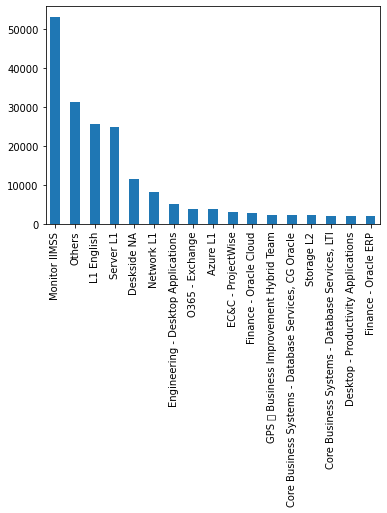

In [ ]:
Group.plot(kind='bar')

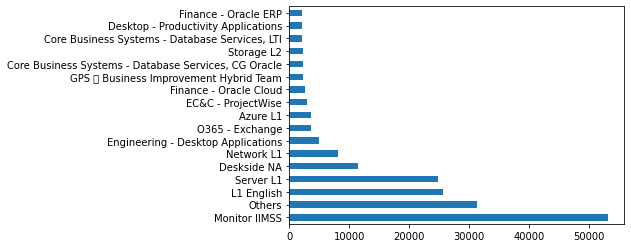

In [ ]:
Group.plot(kind='barh')

In [ ]:
df.columns

Index(['Descript', 'Assignment group'], dtype='object')

In [ ]:
df['Assignment group'].unique()

array(['Network L1', 'Others', 'Monitor IIMSS', 'Azure L1', nan,
       'Server L1', 'O365 - Exchange', 'Deskside NA', 'L1 English',
       'EC&C - ProjectWise', 'Desktop - Productivity Applications',
       'Core Business Systems - Database Services, LTI',
       'GPS \x96 Business Improvement Hybrid Team', 'Storage L2',
       'Engineering - Desktop Applications',
       'Core Business Systems - Database Services, CG Oracle',
       'Finance - Oracle Cloud', 'Finance - Oracle ERP'], dtype=object)

# There is a scope of renaming the Assignment Group names to remove unnecessary stuff like numbers 

In [ ]:
df.loc[df['Assignment group']=='GPS \x96 Business Improvement Hybrid Team', 'Assignment group'] = 'GPS Business Improvement Hybrid Team'

In [ ]:
df['Assignment group'].unique()

array(['Network L1', 'Others', 'Monitor IIMSS', 'Azure L1', nan,
       'Server L1', 'O365 - Exchange', 'Deskside NA', 'L1 English',
       'EC&C - ProjectWise', 'Desktop - Productivity Applications',
       'Core Business Systems - Database Services, LTI',
       'GPS Business Improvement Hybrid Team', 'Storage L2',
       'Engineering - Desktop Applications',
       'Core Business Systems - Database Services, CG Oracle',
       'Finance - Oracle Cloud', 'Finance - Oracle ERP'], dtype=object)

In [ ]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
# trying various different sample sizes - 10k , 50k or 100k 

#df2 = df.sample(10000, random_state=1).copy()

df2 = df.sample(50000, random_state=1).copy()

#df2 = df.sample(100000, random_state=1).copy()


In [ ]:
pd.DataFrame(df2['Assignment group'].unique())

,0
0,Server L1
1,Monitor IIMSS
2,Others
3,L1 English
4,Deskside NA
5,Finance - Oracle ERP
6,Azure L1
7,Engineering - Desktop Applications
8,EC&C - ProjectWise
9,Storage L2


#Dropping All non null values

https://www.geeksforgeeks.org/python-pandas-dataframe-dropna/

In [ ]:
df2.dropna(axis=0, how='any', inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47460 entries, 75495 to 29491
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Descript          47460 non-null  object
 1   Assignment group  47460 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df2 = df2[['Assignment group','Descript']]

In [ ]:
df2.head()

,Assignment group,Descript
75495,Server L1,CH3E-PWVDPM-05 - Alert - DPM: Online recover...
15380,Monitor IIMSS,KACI-PLVBIC-01 - BV_Linux_CPU_Utilization_Cr...
11122,Monitor IIMSS,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...
23231,Monitor IIMSS,AGGR01_SATA - BV_Storage_Pool_Free_Space_Uti...
128102,L1 English,ProjectWise - trouble logging in The professio...


In [ ]:
df2.shape

(47460, 2)

In [ ]:
df2.rename(columns = {'Assignment group':'Product', 'Descript':'Consumer_complaint'}, inplace = True)

In [ ]:
df2.head(2)

,Product,Consumer_complaint
75495,Server L1,CH3E-PWVDPM-05 - Alert - DPM: Online recover...
15380,Monitor IIMSS,KACI-PLVBIC-01 - BV_Linux_CPU_Utilization_Cr...


https://www.geeksforgeeks.org/python-pandas-series-factorize/

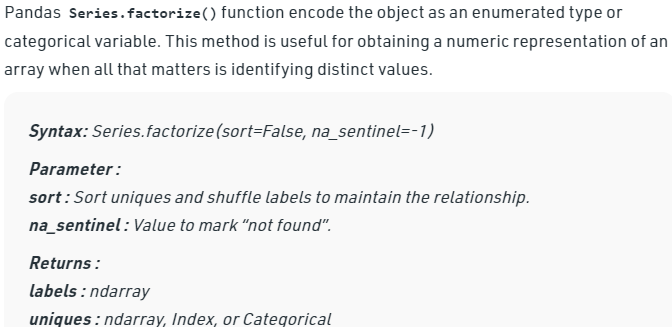

https://www.geeksforgeeks.org/python-pandas-dataframe-values/

# Pandas DataFrame.values() attribute return a Numpy representation of the given DataFrame. Basically returns a Series.

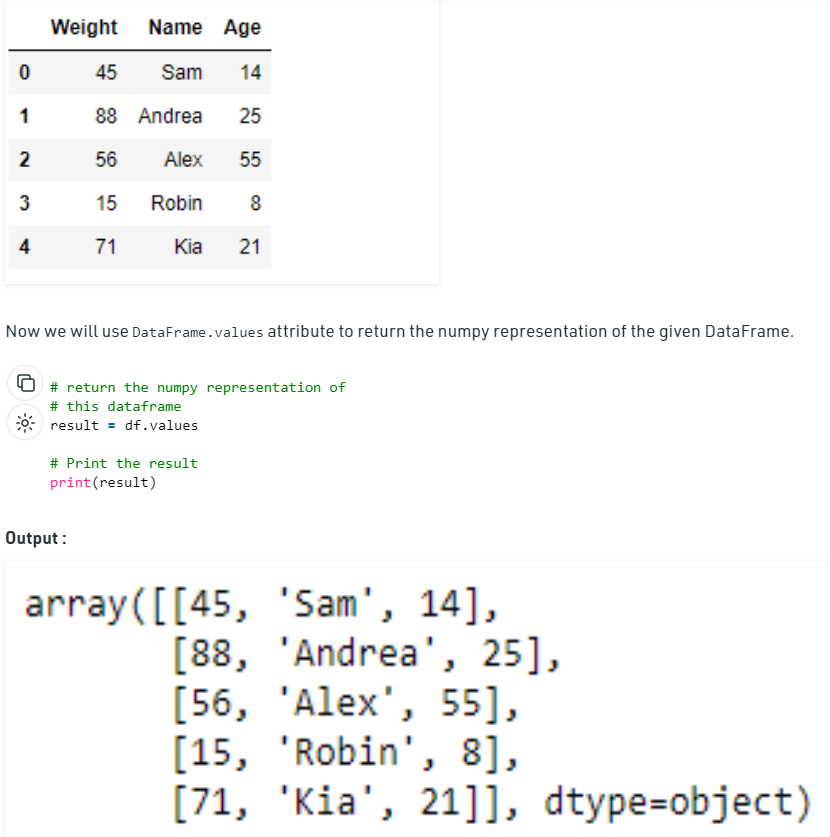

In [ ]:
# Create a new column 'category_id' with encoded categories
# Encoding Category variable with Factorize function 
 
df2['category_id'] = df2['Product'].factorize()[0]


# Category and their code
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
# Dict 1 - for Category to ID -- > Feeding .values (Series data) to the Dictionary
category_to_id = dict(category_id_df.values)

# Dict 1 - for ID to Category 
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
75495,Server L1,CH3E-PWVDPM-05 - Alert - DPM: Online recover...,0
15380,Monitor IIMSS,KACI-PLVBIC-01 - BV_Linux_CPU_Utilization_Cr...,1
11122,Monitor IIMSS,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...,1
23231,Monitor IIMSS,AGGR01_SATA - BV_Storage_Pool_Free_Space_Uti...,1
128102,L1 English,ProjectWise - trouble logging in The professio...,2


In [ ]:
category_id_df

,Product,category_id
75495,Server L1,0
15380,Monitor IIMSS,1
128102,L1 English,2
106834,Deskside NA,3
142875,Finance - Oracle ERP,4
48079,Others,5
181029,Azure L1,6
151562,Engineering - Desktop Applications,7
171643,EC&C - ProjectWise,8
140420,Storage L2,9


In [ ]:
category_id_df.values

array([['Server L1', 0],
       ['Monitor IIMSS', 1],
       ['L1 English', 2],
       ['Deskside NA', 3],
       ['Finance - Oracle ERP', 4],
       ['Others', 5],
       ['Azure L1', 6],
       ['Engineering - Desktop Applications', 7],
       ['EC&C - ProjectWise', 8],
       ['Storage L2', 9],
       ['Network L1', 10],
       ['GPS Business Improvement Hybrid Team', 11],
       ['O365 - Exchange', 12],
       ['Core Business Systems - Database Services, CG Oracle', 13],
       ['Desktop - Productivity Applications', 14],
       ['Finance - Oracle Cloud', 15],
       ['Core Business Systems - Database Services, LTI', 16]],
      dtype=object)

In [ ]:
category_to_id

{'Azure L1': 6,
 'Core Business Systems - Database Services, CG Oracle': 13,
 'Core Business Systems - Database Services, LTI': 16,
 'Deskside NA': 3,
 'Desktop - Productivity Applications': 14,
 'EC&C - ProjectWise': 8,
 'Engineering - Desktop Applications': 7,
 'Finance - Oracle Cloud': 15,
 'Finance - Oracle ERP': 4,
 'GPS Business Improvement Hybrid Team': 11,
 'L1 English': 2,
 'Monitor IIMSS': 1,
 'Network L1': 10,
 'O365 - Exchange': 12,
 'Others': 5,
 'Server L1': 0,
 'Storage L2': 9}

In [ ]:
category_id_df[['category_id', 'Product']].values

array([[0, 'Server L1'],
       [1, 'Monitor IIMSS'],
       [2, 'L1 English'],
       [3, 'Deskside NA'],
       [4, 'Finance - Oracle ERP'],
       [5, 'Others'],
       [6, 'Azure L1'],
       [7, 'Engineering - Desktop Applications'],
       [8, 'EC&C - ProjectWise'],
       [9, 'Storage L2'],
       [10, 'Network L1'],
       [11, 'GPS Business Improvement Hybrid Team'],
       [12, 'O365 - Exchange'],
       [13, 'Core Business Systems - Database Services, CG Oracle'],
       [14, 'Desktop - Productivity Applications'],
       [15, 'Finance - Oracle Cloud'],
       [16, 'Core Business Systems - Database Services, LTI']],
      dtype=object)

In [ ]:
id_to_category

{0: 'Server L1',
 1: 'Monitor IIMSS',
 2: 'L1 English',
 3: 'Deskside NA',
 4: 'Finance - Oracle ERP',
 5: 'Others',
 6: 'Azure L1',
 7: 'Engineering - Desktop Applications',
 8: 'EC&C - ProjectWise',
 9: 'Storage L2',
 10: 'Network L1',
 11: 'GPS Business Improvement Hybrid Team',
 12: 'O365 - Exchange',
 13: 'Core Business Systems - Database Services, CG Oracle',
 14: 'Desktop - Productivity Applications',
 15: 'Finance - Oracle Cloud',
 16: 'Core Business Systems - Database Services, LTI'}

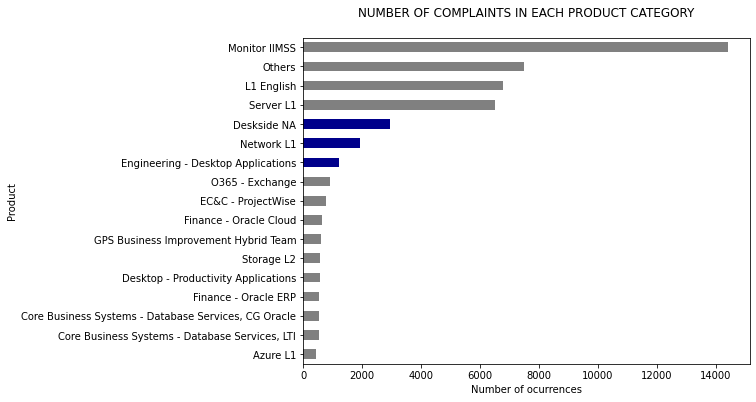

In [ ]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [ ]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Azure L1:
  * Most Correlated Unigrams are: omsworkspacess, notification, raised
  * Most Correlated Bigrams are: missed raised, fw alert, alert notification

==> Core Business Systems - Database Services, CG Oracle:
  * Most Correlated Unigrams are: dbcs, script, poa
  * Most Correlated Bigrams are: script poa, dbcs paas, production dbcs

==> Core Business Systems - Database Services, LTI:
  * Most Correlated Unigrams are: database, lti_freespace_warn, lti
  * Most Correlated Bigrams are: _alwayson_role change, ssmc pwvsql, db cr

==> Deskside NA:
  * Most Correlated Unigrams are: docking, station, laptop
  * Most Correlated Bigrams are: wfh docking, wfh laptop, docking station

==> Desktop - Productivity Applications:
  * Most Correlated Unigrams are: adobe, revu, bluebeam
  * Most Correlated Bigrams are: microsoft office, wfh bluebeam, bluebeam revu

==> EC&C - ProjectWise:
  * Most Correlated Unigrams are: pw, datasource, projectwise
  * Most Correlated Bigrams are: projectwis

In [ ]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)



In [ ]:
# Just for testing
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
cv_df

""
0
1
2
3
4
5
6
7
8
9


In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

Comparison of model performance
The best mean acuracy was obtained with LinearSVC.

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.678547,0.008802
LogisticRegression,0.667635,0.009335
MultinomialNB,0.643708,0.007876
RandomForestClassifier,0.393732,0.005496


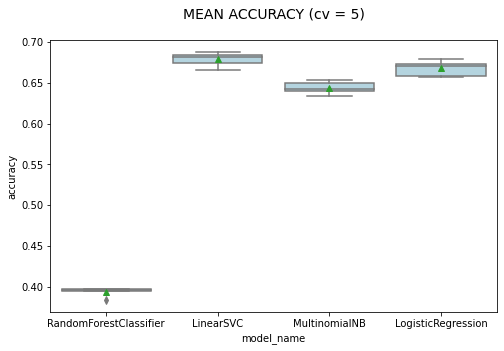

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

#Model Evaluation


In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Precision, Recall, F1-score

In [ ]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))


				CLASSIFICATIION METRICS

                                                      precision    recall  f1-score   support

                                           Server L1       0.76      0.88      0.82       348
                                       Monitor IIMSS       0.84      0.90      0.87       690
                                              Others       0.58      0.60      0.59       430
                                          L1 English       0.50      0.58      0.54       326
                                         Deskside NA       0.41      0.40      0.41       150
                                Finance - Oracle ERP       0.68      0.49      0.57        35
                                            Azure L1       0.92      0.73      0.82        64
                  Engineering - Desktop Applications       0.55      0.58      0.56        73
                                  EC&C - ProjectWise       0.37      0.43      0.40        30
                              

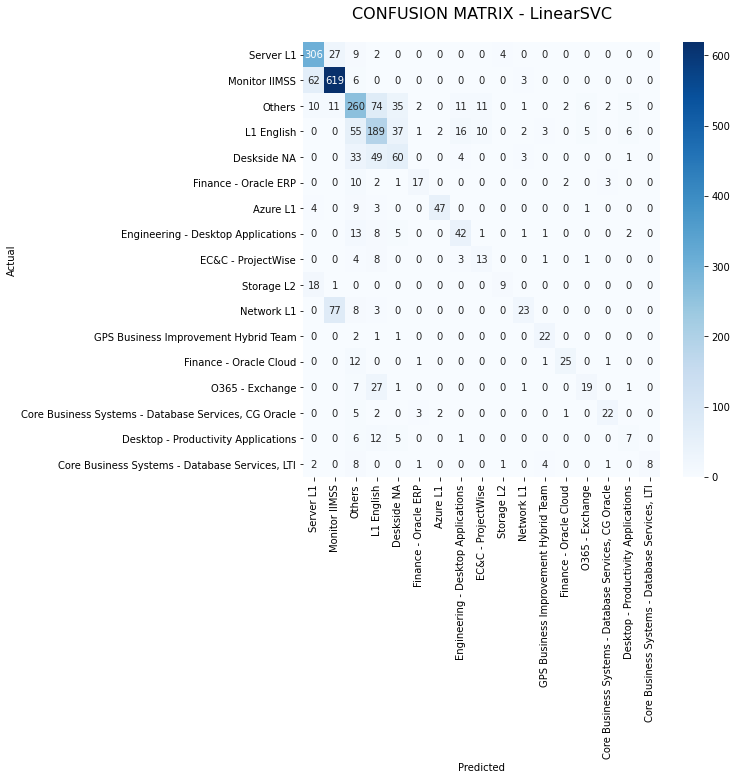

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

Misclassified complaints

Let’s have a look at the cases that were wrongly classified.

In [ ]:
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 20:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
    
      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 
                                                                'Consumer_complaint']])
      print('')

'Monitor IIMSS' predicted as 'Server L1' : 62 examples.


,Product,Consumer_complaint
92200,Monitor IIMSS,KACI-PWVDPM-06 - Custom - DPM: Recovery poin...
94520,Monitor IIMSS,KACI-PWVDPM-06 - Custom - DPM: Recovery poin...
88563,Monitor IIMSS,PORT-PWPDMB-02.NA.BVCORP.NET - StateCollecti...
93795,Monitor IIMSS,KACI-PWVDPM-05 - Custom - Percentage Logical...
94057,Monitor IIMSS,REDH-PWPDCNA-01 - Custom - Percentage Logica...
...,...,...
94394,Monitor IIMSS,KACI-PWVDPM-06 - Custom - DPM: Recovery poin...
90778,Monitor IIMSS,KACI-PWVDPM-15 - Custom - DPM: Recovery poin...
88787,Monitor IIMSS,CH3E-PWVDPM-03 - Custom - DPM: Recovery poin...
88666,Monitor IIMSS,KACI-PWVDPM-15 - Custom - DPM: Recovery poin...



'Server L1' predicted as 'Monitor IIMSS' : 27 examples.


,Product,Consumer_complaint
71482,Server L1,BOST-PWPMPC-01 - Custom - Percentage Logical...
154977,Server L1,SSMC-PWVSCAB-06.NA.BVCORP.NET - StateCollect...
146668,Server L1,VIKH-PWVSQL-07.NA.BVCORP.NET - StateCollecti...
118493,Server L1,KACI-PWVDMA-02 - Custom - Percentage Logical...
115209,Server L1,KACI-PWVDPM-15 - Custom - DPM: Recovery poin...
51453,Server L1,KACI-PWVAPP-23 - Custom - Percentage Logical...
77697,Server L1,BOST-PWPMPC-01 - Custom - Percentage Logical...
73693,Server L1,KACI-PWVDPM-06 - Custom - DPM: Recovery poin...
53593,Server L1,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...
170150,Server L1,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...



'Network L1' predicted as 'Monitor IIMSS' : 77 examples.


,Product,Consumer_complaint
132555,Network L1,BVNROMLCRMMR01 - Node down
69663,Network L1,GIGABITETHERNET0/0/2 - GI0/0/2 - BV_WANInter...
68697,Network L1,BVNLOSAWA02 - Node down
50804,Network L1,BVATUBA2MAS01 - Node down
43107,Network L1,BVAVIKHF06WA02 - Node down
...,...,...
69250,Network L1,BVABANTWA05 - Node down
178883,Network L1,BVEKUSIWA02 - Node down
159582,Network L1,BVAHKNGF43IR01 - BV_WANInterface_BandWidth_T...
142240,Network L1,BVNBUCKWA02 - Node down



'L1 English' predicted as 'Others' : 55 examples.


,Product,Consumer_complaint
59724,L1 English,I do not have a Teams Add-in for Outlook. I ca...
109945,L1 English,WEBCHAT_9485639 Created Ticket: Chat Generated...
126530,L1 English,Monitor - Error connecting to other monitor
110795,L1 English,Network Password
119777,L1 English,Bluebeam - Issue printing to Vendor Software
110311,L1 English,Mouse - install
172108,L1 English,Still havent been helped
170252,L1 English,Shared Drive - Error
59771,L1 English,'++WFH++ ETS - Not able to fill time sheet
172831,L1 English,Outllook is showing not connected.



'Deskside NA' predicted as 'Others' : 33 examples.


,Product,Consumer_complaint
63509,Deskside NA,Audio - professionals cannot get any audio to ...
50032,Deskside NA,fan - malfunction error
134825,Deskside NA,"Printer's Driver - Unable to install, error ""T..."
104547,Deskside NA,Laptop- No sound.
125740,Deskside NA,"Jack Boyles, Nadl231050, Unable to connect to ..."
67435,Deskside NA,Outlook - Need Password Prompt
66958,Deskside NA,"I was issued a Platronics P7200 speakerphone, ..."
57694,Deskside NA,G drive does not detected
124791,Deskside NA,Outlook - Asking for password
57427,Deskside NA,PC - Unable to connect to network



'Others' predicted as 'L1 English' : 74 examples.


,Product,Consumer_complaint
175133,Others,Admin Rights - Requested
124086,Others,Microsoft outlook- Unable to connect to server
134691,Others,cannot access my email on my computer
168562,Others,'+WFH+Outlook--Unable to open
134389,Others,Computer working very slow. All the applicatio...
...,...,...
174956,Others,WFH - Microphone & Speakers stopped working
131828,Others,UNIX - Password Reset Request
113485,Others,Help Desk - Site is not trusted when trying to...
163483,Others,Field - Peoplesoft - password not recognized



'Deskside NA' predicted as 'L1 English' : 49 examples.


,Product,Consumer_complaint
63296,Deskside NA,Active Directory - password reset
135663,Deskside NA,'+WFH+ VPN - Certificate Validation Failure - ...
136462,Deskside NA,'+WFH+ Add Printer - Needs to add in B&V PC -...
108514,Deskside NA,'+WFH+ Active Directory- Needs password reset
107285,Deskside NA,In Ofice Verizon Jetpack--Cannot login to Air...
108776,Deskside NA,Dell Latitude 5300 - New lease laptop how to t...
40779,Deskside NA,There are no speakers connected to my PC and I...
136238,Deskside NA,'+WFH+ Admin rights- Admin rights will not app...
108630,Deskside NA,Bluebeam not opening any files
58874,Deskside NA,'+WFH+ : VPN - connection issue



'O365 - Exchange' predicted as 'L1 English' : 27 examples.


,Product,Consumer_complaint
102014,O365 - Exchange,Outlook - Unable to add email on mobile
30362,O365 - Exchange,'+WFH+ Outlook - password error
102910,O365 - Exchange,'+WFH+ Sharepoint - Workflow
102914,O365 - Exchange,One drive - supervisor access for termed emplo...
158738,O365 - Exchange,Outlook and Teams- Triangle sign cannot connec...
100722,O365 - Exchange,Outlook - Unable to open 3rd party email
103197,O365 - Exchange,Office 365 PasswordI need either a reminder of...
101544,O365 - Exchange,Navakarn (New Hired Professional) cannot acces...
103489,O365 - Exchange,N-IM031145987 Calendar not reflecting accurat...
100968,O365 - Exchange,WFH+VPN+OneNote-Tabs won't transfer



'Others' predicted as 'Deskside NA' : 35 examples.


,Product,Consumer_complaint
169867,Others,Ports on docking station is not working
68272,Others,Cannot receive JPEG file from Bluetooth.
35981,Others,The applied software (naviswork manager) didn'...
185733,Others,Please unblock page
120314,Others,Reboot Batch PC NADL218296 in OP Data Center
38356,Others,Need bit locker recovery key for ASDL206946.
109791,Others,Reimage ASDL206292 to Win10ASDL206292 was a PH...
134576,Others,I have been working with Dell Support regardin...
137418,Others,Remote Desktop - Not working
144813,Others,Login error 'The device does not meet your org...



'L1 English' predicted as 'Deskside NA' : 37 examples.


,Product,Consumer_complaint
121949,L1 English,'+WFH+ - Audio jack - Not Working on new computer
184635,L1 English,'+WFH+Network Drives - Connection issue
48853,L1 English,'+WFH+Laptop- How to set up.
184580,L1 English,'+WFH+Sharepoint - Encountered an error
129860,L1 English,'+WFH+ Biowin- needs version update
55539,L1 English,WFH Pin--Need to reset pin on computer
183350,L1 English,URGENT - VPN Connection Failure
59863,L1 English,'++WFH++ New laptp - Missing software
184512,L1 English,'+WFH+Laptop - network connectivity
113735,L1 English,"'+WFH+ VNP - Unable to connect to VPN, error ""..."


#Most correlated terms with each category

In [ ]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Azure L1':
  * Top unigrams: azure, vm, wvd, dsmc
  * Top bigrams: drive space, wfh unable, pwvrds 01, virtual desktop

==> 'Core Business Systems - Database Services, CG Oracle':
  * Top unigrams: capgemini_rhel_cpu_alert, poa, sqr, toa
  * Top bigrams: data fix, po data, 02 capgemini_rhel_cpu_alert, production dbcs

==> 'Core Business Systems - Database Services, LTI':
  * Top unigrams: lti_freespace_warn, database, lti, pdss
  * Top bigrams: db cr, ssmc pwvsql, kaci pwvsql, password change

==> 'Deskside NA':
  * Top unigrams: dock, david, ipad, hold
  * Top bigrams: windows update, installation failed, won connect, wfh network

==> 'Desktop - Productivity Applications':
  * Top unigrams: adobe, blue, onedrive, bluebeam
  * Top bigrams: microsoft office, wfh microsoft, pdf file, error microsoft

==> 'EC&C - ProjectWise':
  * Top unigrams: projectwise, pw, additional, energy
  * Top bigrams: files warning, projectwise log, open files, excel file

==> 'Engineering - Desktop Appl

#Predictions

Now let's make a few predictions on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

# Let's see what is the classification that our model gives to this new complaint.



In [ ]:
new_complaint = """I can not login to Projectwise Datasource"""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['EC&C - ProjectWise']


In [ ]:
df2[df2['Consumer_complaint'] == new_complaint]

,Product,Consumer_complaint,category_id


In [ ]:
new_complaint_2 = """can not login to datasource"""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Others']
